In [73]:
import os
import numpy as np
import sys
import logging
import concurrent.futures
import time
from datetime import datetime
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Transformer, CRS
from shapely.geometry import Polygon, Point
from sliderule import sliderule, icesat2, earthdata, h5, ipysliderule, io
import warnings
from IPython import display
import json

warnings.filterwarnings('ignore')

In [74]:
site = "blackrock"


# Select predetermined track
# site = "utqiagvik"
site = "blackrock"

resolutions_of_fitting = [6, 10, 15, 20, 40, 80]
resolutions_of_sampling = [3, 5, 7, 10, 20, 40]

# DEM
dem_to_sample = "usgs3dep-1meter-dem" # arcticdem-mosaic or usgs3dep-1meter-dem


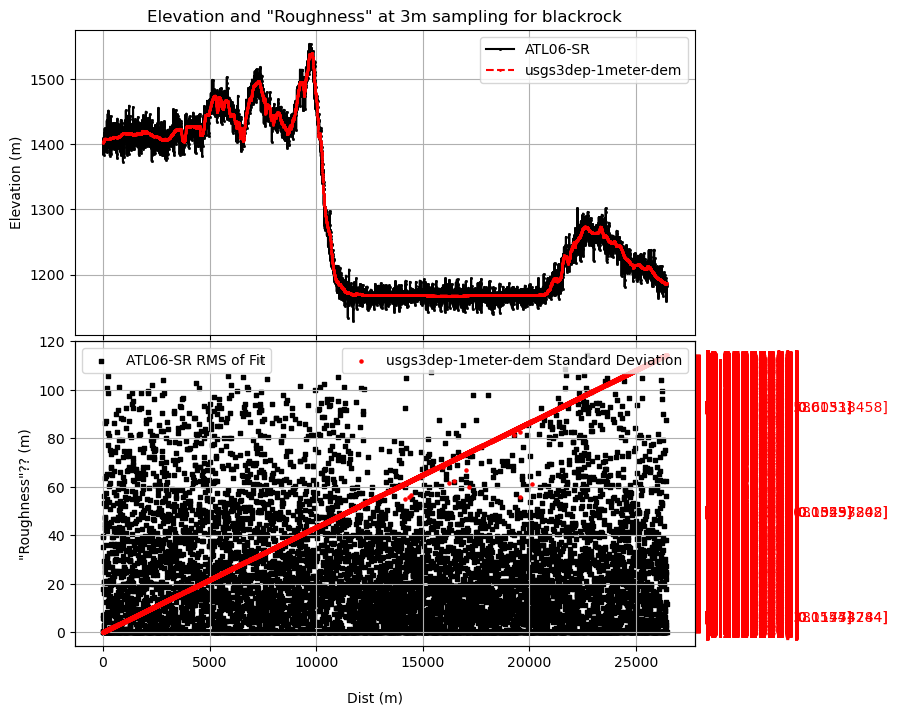

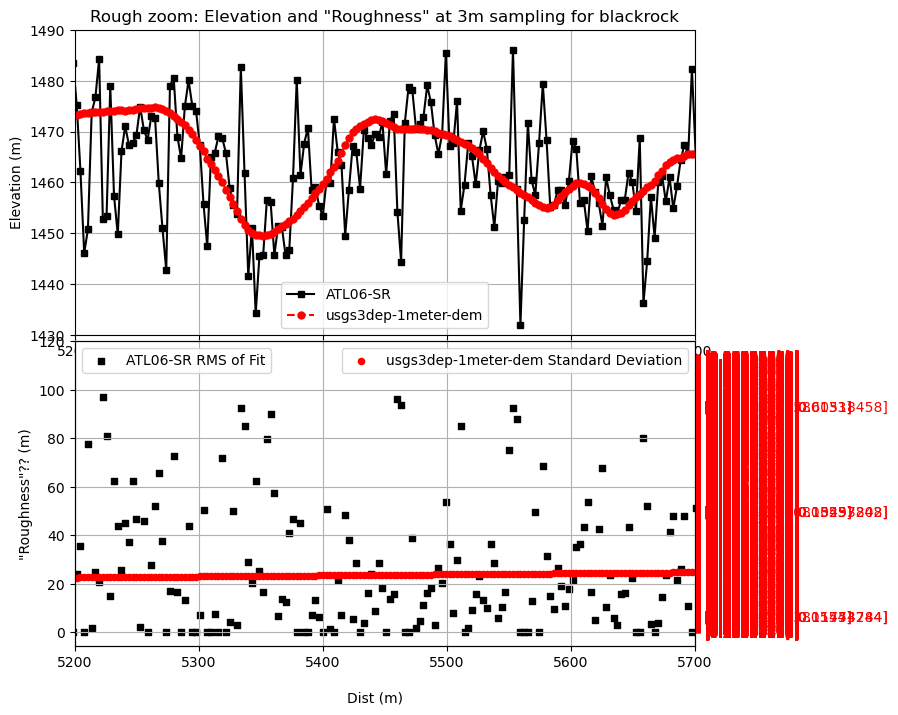

Error in callback <function flush_figures at 0x7f3b3cf2cc10> (for post_execute):


KeyboardInterrupt: 

In [75]:
for index in range(len(resolutions_of_sampling)):

    res_of_fit = resolutions_of_fitting[index]
    res_of_samp = resolutions_of_sampling[index]

# path = f"~/surfit/data/"
    path = os.getcwd()
    filename = f"{path}/{site}_ATL06_segLen{int(res_of_fit)}m_stepDist{int(res_of_samp)}m_sampled_{dem_to_sample}_at_{int(res_of_samp)}m.csv"
    
    df = pd.read_csv(filename)
    
    dem_el = df["dem_stats.value"].values

    for i in range(len(dem_el)):
        if isinstance(dem_el[i], np.ndarray):
            dem_el[i] = dem_el[i][0]

    dem_std = df["dem_stats.stdev"].values

    for i in range(len(dem_std)):
        if isinstance(dem_std[i], np.ndarray):
            dem_std[i] = dem_std[i][0]

    dist = df['distance']-np.min(df['distance'])
    atl06_h = df.h_mean
    atl06_rms = df.rms_misfit

    # Create the figure and subplots
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Plotting the first line plot on the left y-axis
    axs[0].plot(dist, atl06_h, 'ks-', ms=1, label='ATL06-SR')
    axs[0].plot(dist, dem_el, 'ro--', ms=1, label=f'{dem_to_sample}')
    axs[0].set_ylabel('Elevation (m)')
    axs[0].legend()

    # Plotting the second line plot on the left y-axis
    axs[1].scatter(dist, atl06_rms, s=5, marker='s', color='black', label='ATL06-SR RMS of Fit')
    axs[1].set_ylabel('"Roughness"?? (m)')
    axs[1].legend(loc='upper left')

    # Plotting the second scatter plot on the right y-axis
    ax2= axs[1].twinx()
    ax2.scatter(dist, dem_std, s=5, marker='o', color='red', label=f'{dem_to_sample} Standard Deviation')
    ax2.legend(loc='upper right')
    ax2.tick_params(axis='y', colors='red')

    # Set x-axis label
    fig.text(0.5, 0.04, 'Dist (m)', ha='center')

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.02)
    axs[0].grid()
    axs[1].grid()

    axs[0].set_title(f'Elevation and "Roughness" at {res_of_samp}m sampling for {site}')

    plt.savefig(f'{site}_sampling{res_of_samp}m_full.png', dpi=150)

    # Create the figure and subplots
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Plotting the first line plot on the left y-axis
    axs[0].plot(dist, atl06_h, 'ks-', ms=5, label='ATL06-SR')
    axs[0].plot(dist, dem_el, 'ro--', ms=5, label=f'{dem_to_sample}')
    axs[0].set_ylabel('Elevation (m)')
    axs[0].legend()

    # Plotting the second line plot on the left y-axis
    axs[1].scatter(dist, atl06_rms, s=20, marker='s', color='black', label='ATL06-SR RMS of Fit')
    axs[1].set_ylabel('"Roughness"?? (m)')
    axs[1].legend(loc='upper left')

    # Plotting the second scatter plot on the right y-axis
    ax2= axs[1].twinx()
    ax2.scatter(dist, dem_std, s=20, marker='o', color='red', label=f'{dem_to_sample} Standard Deviation')
    ax2.legend(loc='upper right')
    ax2.tick_params(axis='y', colors='red')

    # Set x-axis label
    fig.text(0.5, 0.04, 'Dist (m)', ha='center')

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.02)
    axs[0].grid()
    axs[1].grid()

    axs[0].set_title(f'Rough zoom: Elevation and "Roughness" at {res_of_samp}m sampling for {site}')

    axs[0].set_xlim([5200, 5700])
    axs[0].set_ylim([1430, 1490])

    axs[1].set_xlim([5200, 5700])

    # ax2.set_ylim([11, 11.1])

    plt.savefig(f'{site}_sampling{res_of_samp}m_zoom_rough.png', dpi=150)

    # Create the figure and subplots
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Plotting the first line plot on the left y-axis
    axs[0].plot(dist, atl06_h, 'ks-', ms=5, label='ATL06-SR')
    axs[0].plot(dist, dem_el, 'ro--', ms=5, label=f'{dem_to_sample}')
    axs[0].set_ylabel('Elevation (m)')
    axs[0].legend()

    # Plotting the second line plot on the left y-axis
    axs[1].scatter(dist, atl06_rms, s=20, marker='s', color='black', label='ATL06-SR RMS of Fit')
    axs[1].set_ylabel('"Roughness"?? (m)')
    axs[1].legend(loc='upper left')

    # Plotting the second scatter plot on the right y-axis
    ax2= axs[1].twinx()
    ax2.scatter(dist, dem_std, s=20, marker='o', color='red', label=f'{dem_to_sample} Standard Deviation')
    ax2.legend(loc='upper right')
    ax2.tick_params(axis='y', colors='red')

    # Set x-axis label
    fig.text(0.5, 0.04, 'Dist (m)', ha='center')

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.02)
    axs[0].grid()
    axs[1].grid()

    axs[0].set_title(f'Flat zoom: Elevation and "Roughness" at {res_of_samp}m sampling for {site}')

    axs[0].set_xlim([11000, 11500])
    axs[0].set_ylim([1150, 1200])

    axs[1].set_xlim([11000, 11500])

    # ax2.set_ylim([11, 11.1])

    plt.savefig(f'{site}_sampling{res_of_samp}m_zoom_flat.png', dpi=150)